        ┌──────────────┐ ░ ┌─┐   
   q_0: ┤0             ├─░─┤M├───
        │  Custom Gate │ ░ └╥┘┌─┐
   q_1: ┤1             ├─░──╫─┤M├
        └──────────────┘ ░  ║ └╥┘
meas: 2/════════════════════╩══╩═
                            0  1 


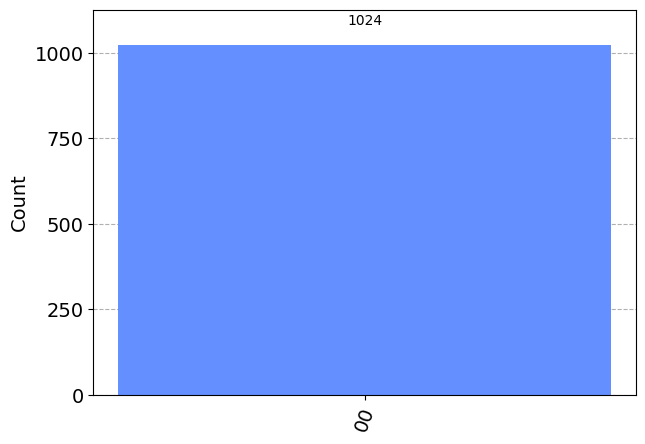

In [2]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.extensions import UnitaryGate
from qiskit.visualization import plot_histogram

# Define the unitary matrix for the custom gate
theta = np.pi / 4  # Some angle
U = np.array([[np.exp(1j * theta), 0, 0, 0],
              [0, np.exp(-1j * theta), 0, 0],
              [0, 0, np.exp(-1j * theta), 0],
              [0, 0, 0, np.exp(1j * theta)]])

# Create the custom gate using the UnitaryGate class
custom_gate = UnitaryGate(U, label="Custom Gate")

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply the custom gate to the qubits
qc.append(custom_gate, [0, 1])

# Measure both qubits
qc.measure_all()

# Visualize the circuit
print(qc)

# Use the Qiskit Aer simulator
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit
t_qc = transpile(qc, simulator)

# Run the simulation and get the result
result = simulator.run(t_qc).result()

# Get the counts (measurement outcomes) from the result
counts = result.get_counts()

# Visualize the measurement outcomes
plot_histogram(counts)